In [2]:
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
im = Image.open("Mona_Lisa.jpg") 
im_gray= im.convert('LA')


In [4]:
im_gray.show()

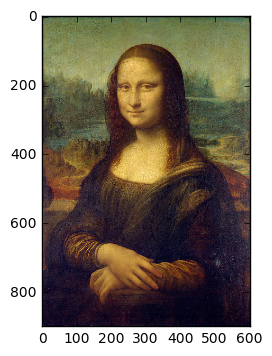

In [10]:
plt.imshow(im)
plt.show()

In [5]:
im_gray_load=im_gray.load()
im_load=im.load()

In [6]:
height,width = im.size
all_pixels=[]
for i in range(height):
    for j in range (width):
        all_pixels.append((i,j))

In [7]:
len(all_pixels)

543600

In [8]:
X=[] 
gray_pixels = []
for i in range(5000): #choosing random 5000 pixels
    ran_x=random.random()*1000
    if ran_x>=604:
        ran_x/=10
    ran_x=int(ran_x)
    ran_y=random.random()*1000
    if ran_y>=900:
        ran_y/=10
    ran_y=int(ran_y)
    X.append([ran_x,ran_y]) #contains the 5,000 train coordinates
    gray_rgb, ran = im_gray_load[ran_x,ran_y]
    gray_pixels.append(gray_rgb) #contains the brightness of the coordinates in X

In [9]:
gray_pixels[400]

51

In [10]:
#2d - standardize
standardized_pix=[]
standardized_elem=0.0
for i in range(len(gray_pixels)): #5000 loop
    standardized_elem = gray_pixels[i]/255.0 #rescaling to [0,1]
    standardized_pix.append(standardized_elem)

In [11]:
color_pixels = []
for pixel in X:
    rgb, ran, m = im_load[pixel[0], pixel[1]]
    color_pixels.append(rgb)

In [12]:
from sklearn.ensemble import RandomForestRegressor
def color_experimentation (X_train, num_trees, depth):    
    forest = RandomForestClassifier(n_estimators=num_trees, max_depth=depth)
    forest.fit(X_train, color_pixels)
    prediction = forest.predict(size_arr)
    plt.imshow(np.array(prediction).reshape(height, width))
    plt.show()

In [13]:
def experimentation (X_train, num_estimators, depth):    
    forest = RandomForestClassifier(n_estimators=num_estimators, max_depth=depth)
    forest.fit(X_train, gray_pixels)
    prediction = forest.predict(all_pixels)
    plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
    plt.show()

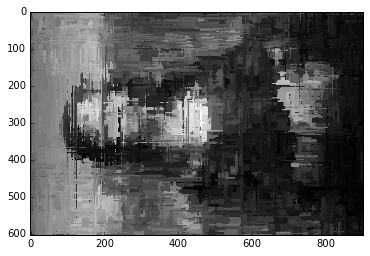

In [13]:
#2f
experimentation(X, 10, None)

single decision tree with depth as 1


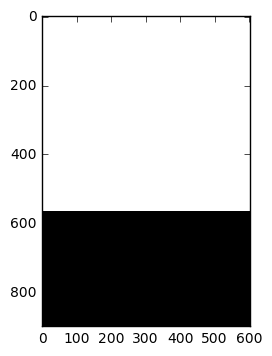

single decision tree with depth as 2


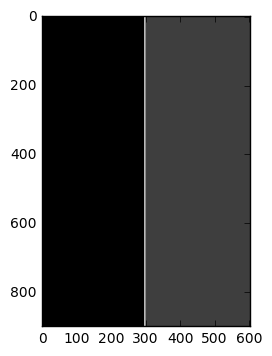

single decision tree with depth as 3


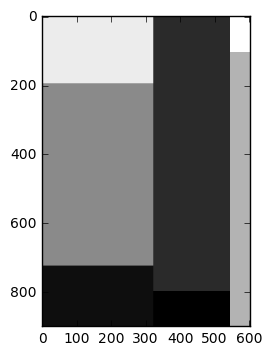

single decision tree with depth as 4


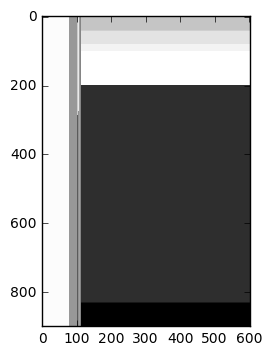

single decision tree with depth as 5


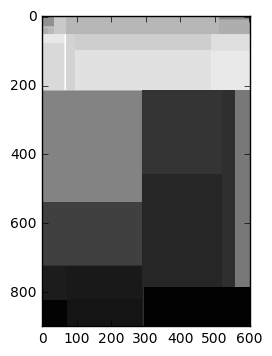

single decision tree with depth as 10


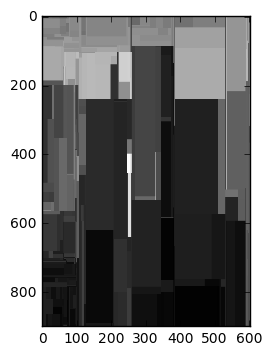

single decision tree with depth as 15


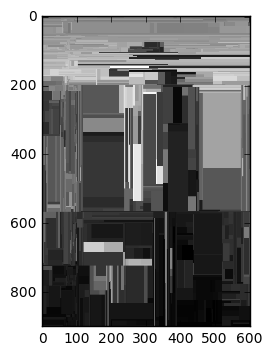

In [56]:
#2g
depths=[1,2,3,4,5,10,15]
for depth in depths:
    print ('single decision tree with depth as ' + str(depth))
    experimentation(X,1,depth)

depth is 7 while number of trees is 1


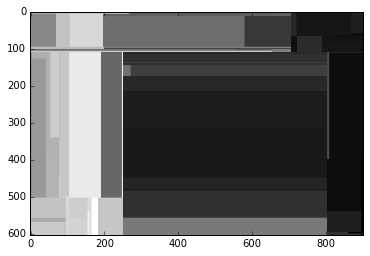

depth is 7 while number of trees is 3


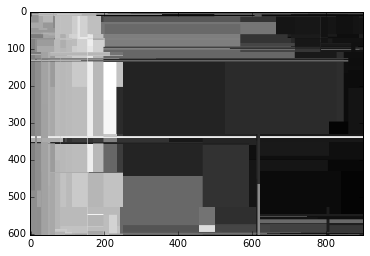

depth is 7 while number of trees is 5


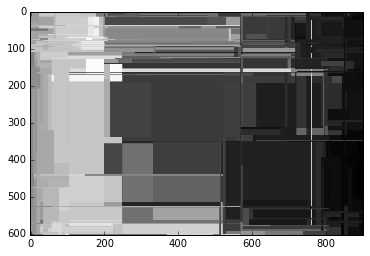

depth is 7 while number of trees is 10


In [ ]:
trees=[1, 3, 5, 10, 100]
for tree in trees:
    print ('depth is 7 while number of trees is ' +str(tree))
    experimentation(X,tree,7)

depth is 7 while number of trees is 25


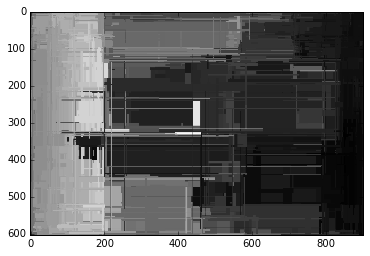

In [14]:
remaining_trees=[25]
for tree in remaining_trees:
    print ('depth is 7 while number of trees is ' +str(tree))
    experimentation(X,tree,7)

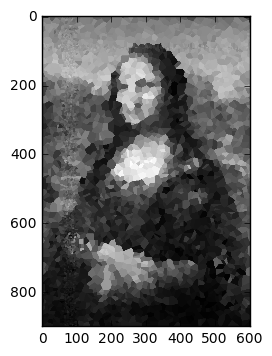

In [29]:
#2g-c
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X, gray_pixels)
knn_predict = knn.predict(size_arr)
to_view = np.asarray(knn_predict)
to_view = to_view.reshape(height,width)
plt.imshow (to_view, cmap = "gray")
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score
K = [1,3,5,10,20]

def KNN_test(K):
    K_score = 0
    K_accuracy = 0
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X, gray_pixels)
    knn_predict = knn.predict(size_arr)
    to_view = np.asarray(knn_predict)
    to_view = to_view.reshape(height,width)
    score = cross_val_score(knn, X, gray_pixels).mean()
    if score > K_score:
        K_score = score
        plt.imshow (to_view, cmap = "gray")
        plt.show()
    return (K_score)

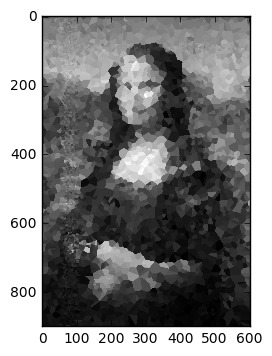

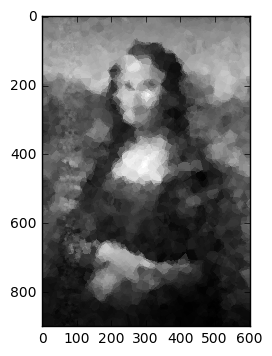

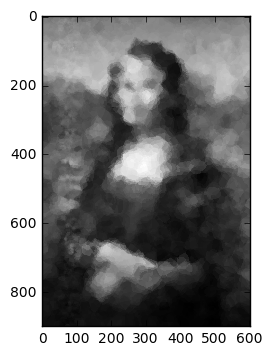

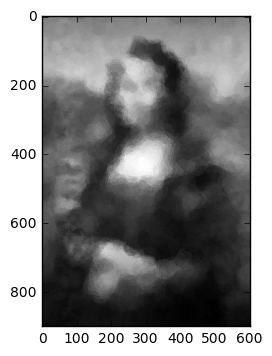

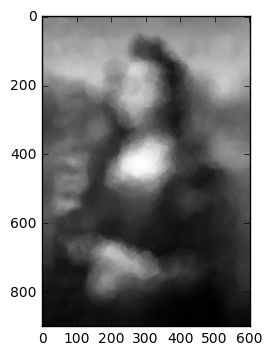

In [31]:
new_score = 0
best_k=0
k_score = 0
for k in K:
    new_score=KNN_test(k)
    if new_score>k_score:
        k_score=new_score
        best_k=k

In [33]:
best_k
k_score

0.89166348576718468